In [23]:
import nonlinearity as nl
import feed_forward as f

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split

import time

In [4]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [5]:
print(np.unique(mnist.target), mnist.target.shape)
print(mnist.data.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] (70000,)
(70000, 784)


In [6]:
mnist.target.shape = (mnist.target.shape[0], 1)

In [31]:
print(np.unique(mnist.target), mnist.target.shape)
print(np.unique(mnist.data/255),   mnist.data.shape)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9.] (70000, 1)
[ 0.          0.00392157  0.00784314  0.01176471  0.01568627  0.01960784
  0.02352941  0.02745098  0.03137255  0.03529412  0.03921569  0.04313725
  0.04705882  0.05098039  0.05490196  0.05882353  0.0627451   0.06666667
  0.07058824  0.0745098   0.07843137  0.08235294  0.08627451  0.09019608
  0.09411765  0.09803922  0.10196078  0.10588235  0.10980392  0.11372549
  0.11764706  0.12156863  0.1254902   0.12941176  0.13333333  0.1372549
  0.14117647  0.14509804  0.14901961  0.15294118  0.15686275  0.16078431
  0.16470588  0.16862745  0.17254902  0.17647059  0.18039216  0.18431373
  0.18823529  0.19215686  0.19607843  0.2         0.20392157  0.20784314
  0.21176471  0.21568627  0.21960784  0.22352941  0.22745098  0.23137255
  0.23529412  0.23921569  0.24313725  0.24705882  0.25098039  0.25490196
  0.25882353  0.2627451   0.26666667  0.27058824  0.2745098   0.27843137
  0.28235294  0.28627451  0.29019608  0.29411765  0.29803922  0.30196078

In [8]:
enc = OneHotEncoder(n_values=10, sparse=False)
target = enc.fit_transform(mnist.target)

In [9]:
idx = np.random.choice(len(target), 10)
print(target[idx])
print(mnist.target[idx])

[[ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 3.]
 [ 7.]
 [ 1.]
 [ 1.]
 [ 9.]
 [ 8.]
 [ 1.]
 [ 5.]
 [ 9.]
 [ 0.]]


In [32]:
train_x, test_x, train_y, test_y = train_test_split(mnist.data/255, target, test_size=0.15, random_state=0)

In [33]:
idx = np.random.choice(len(test_x), 10)
print(test_x[idx])
print(test_y[idx])

print()

idx = np.random.choice(len(train_x), 10)
print(train_x[idx])
print(train_y[idx])

print()

print(len(train_x), len(train_y))
print(len(test_x), len(test_y))

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]

[[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  

In [34]:
nn = f.FeedForwardNet(layers=[784,256,10], transforms=[nl.Sigmoid, nl.Softmax])

In [35]:
time = time.time()
nn.fit(train_x, train_y, lr=0.1, max_iter=25, mini_batch_size=10,\
      save_accuracy=True, save_costs=True, report_every=1)
#      test_x=test_x, test_y=test_y)
print('Training ')

Epoch 1: 0.9575966386554622% accuracy
Epoch 2: 0.9714621848739495% accuracy
Epoch 3: 0.9755126050420168% accuracy
Epoch 4: 0.9817310924369748% accuracy
Epoch 5: 0.980655462184874% accuracy
Epoch 6: 0.9813949579831933% accuracy
Epoch 7: 0.9857478991596639% accuracy
Epoch 8: 0.9839159663865547% accuracy
Epoch 9: 0.9900504201680672% accuracy
Epoch 10: 0.9909747899159664% accuracy
Epoch 11: 0.9905378151260504% accuracy
Epoch 12: 0.992436974789916% accuracy
Epoch 13: 0.9946218487394958% accuracy
Epoch 14: 0.9943361344537816% accuracy
Epoch 15: 0.9958151260504202% accuracy
Epoch 16: 0.9965042016806722% accuracy
Epoch 17: 0.9978151260504202% accuracy
Epoch 18: 0.9980672268907563% accuracy
Epoch 19: 0.9985546218487394% accuracy
Epoch 20: 0.9986890756302521% accuracy
Epoch 21: 0.9995798319327731% accuracy
Epoch 22: 0.9994117647058823% accuracy
Epoch 23: 0.9997983193277311% accuracy
Epoch 24: 0.9999327731092437% accuracy
Epoch 25: 0.9999663865546219% accuracy
Training completed


[8333.6908275762944, 5491.2459843658371, 4616.8296021413835, 3607.2802158568643, 3770.723085083358, 3421.6033464121829, 2662.8881024199372, 2979.8497789566118, 1845.5778517444246, 1692.177164990178, 1709.3926503254288, 1361.8752400740182, 1058.8310884271352, 1074.3109674745424, 823.61863219525219, 679.92464123949912, 441.37128557942754, 409.48984488989311, 349.12508364277994, 284.97235563943639, 171.31430415251995, 197.78956645212094, 104.61620795576198, 78.043086167229205, 54.155845880808052]


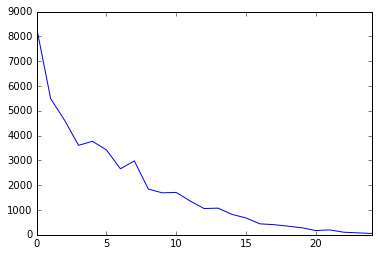

In [36]:
print(nn.costs)
pd.Series(nn.costs).plot()

In [80]:
def predict_and_plot_image_index(idx):
    pred = pd.Series(nn.predict(mnist.data[idx])[0])
    pred.plot(kind='bar')

    # show image
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.matshow(mnist.data[idx].reshape(28,28), cmap = matplotlib.cm.binary)
    plt.xticks(np.array([]))
    plt.yticks(np.array([]))
    plt.title('Index {}, Predicted {}, Actually {}'.format(idx, pred.argmax(), mnist.target[idx]))
    plt.show()

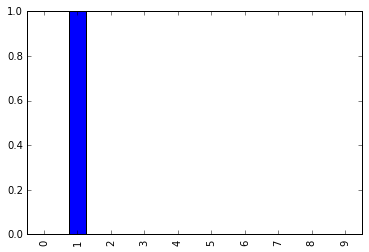

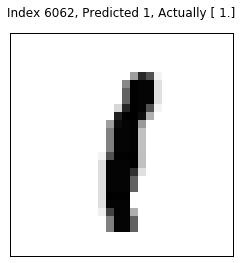

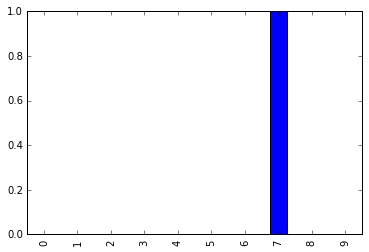

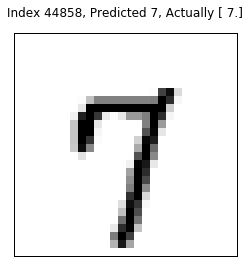

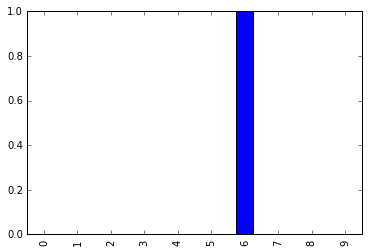

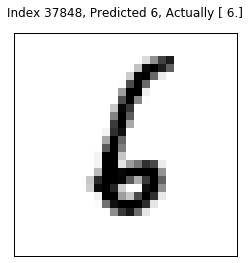

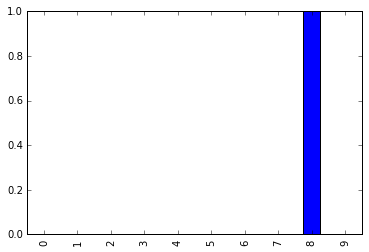

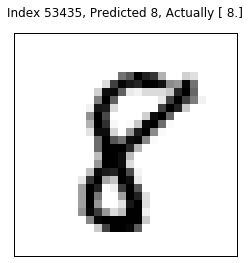

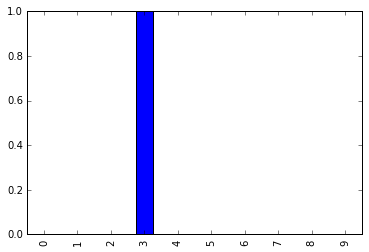

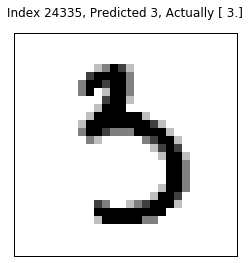

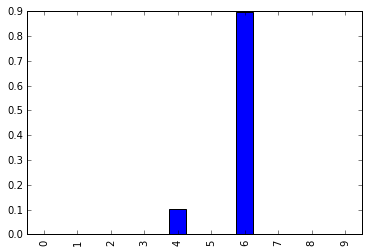

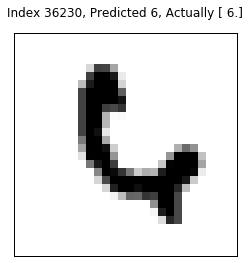

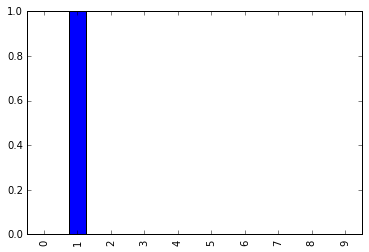

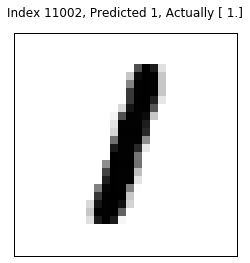

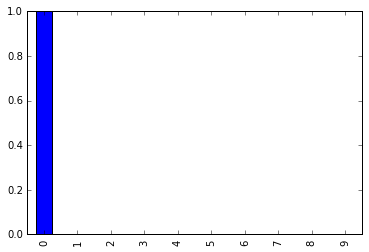

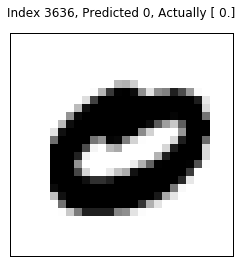

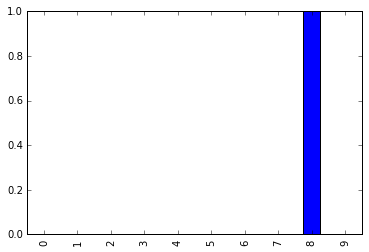

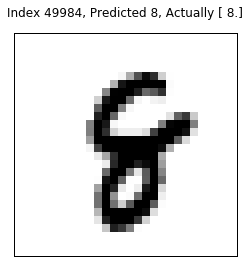

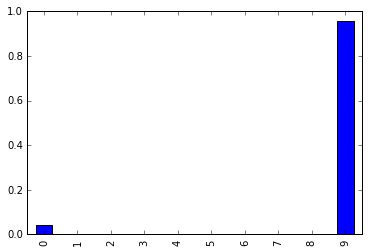

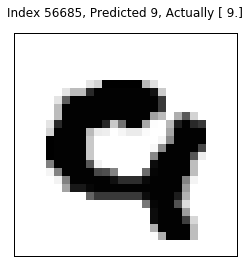

In [84]:
import random
for i in range(10):
    predict_and_plot_image_index(random.choice(range(len(mnist.data))))

[ 0.36499374  0.36649832  0.36666399  0.37081911  0.37149289  0.37695846
  0.37808121  0.38167606  0.3835828   0.38817831  0.39444675  0.39460584
  0.40086169  0.40396827  0.40594048  0.40855162  0.40907799  0.41111514
  0.4125736   0.41423337  0.41719944  0.42024691  0.42039362  0.42382616
  0.42700697  0.42955903  0.42999143  0.43097477  0.43938959  0.4405941 ]


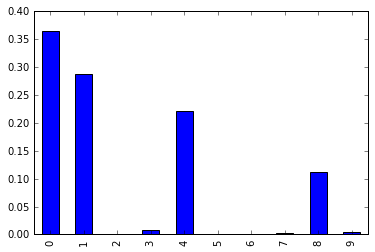

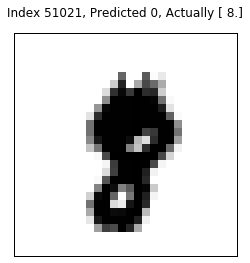

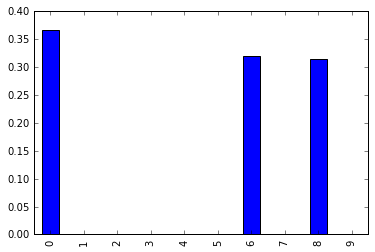

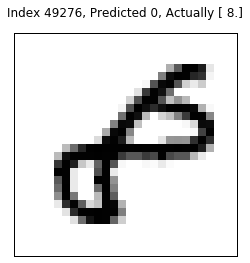

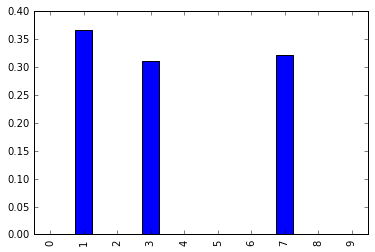

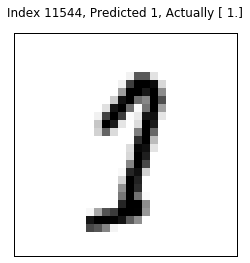

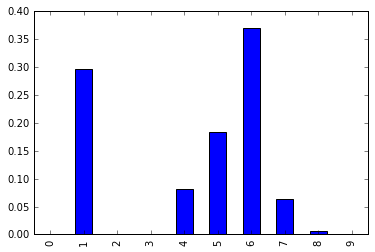

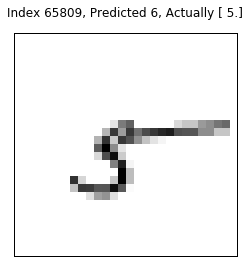

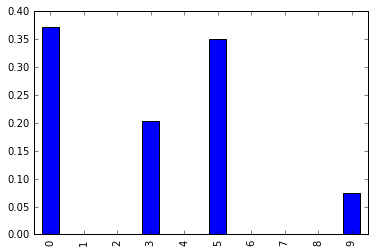

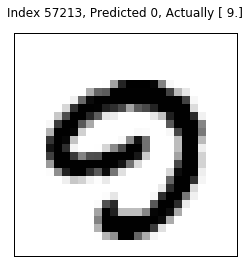

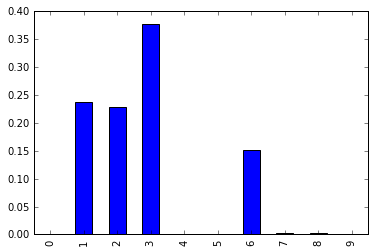

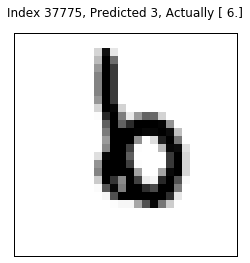

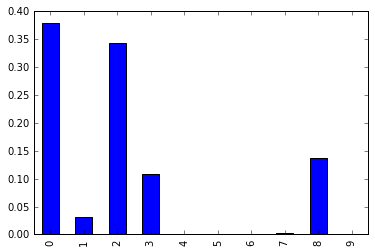

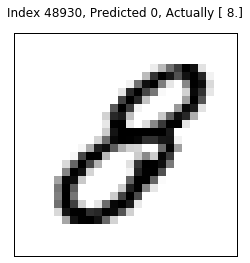

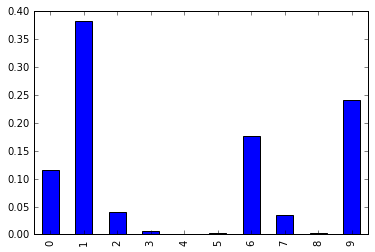

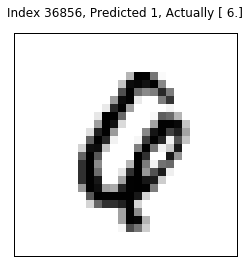

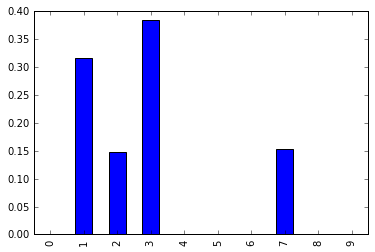

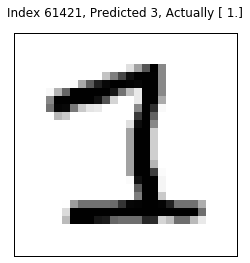

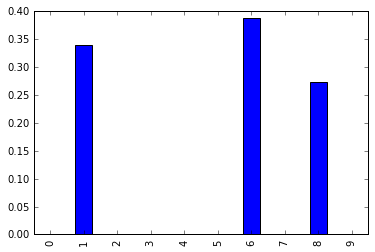

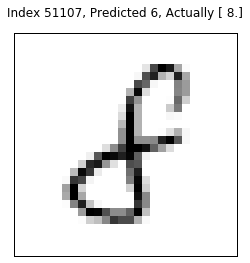

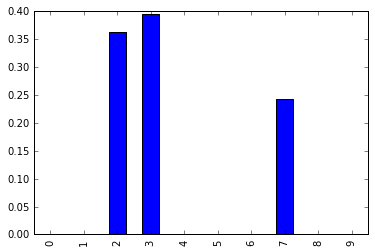

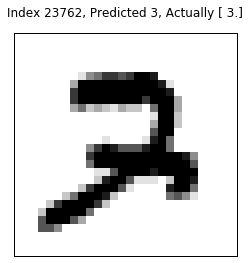

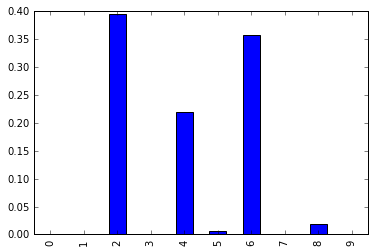

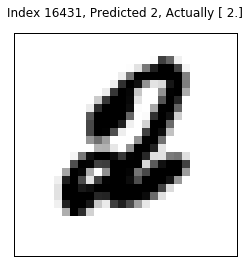

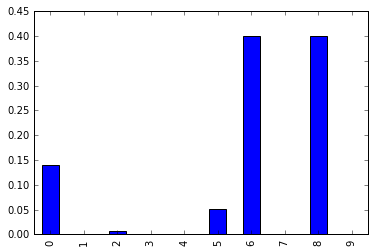

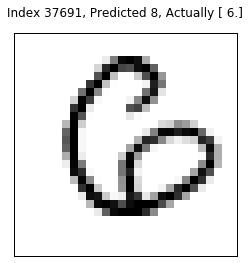

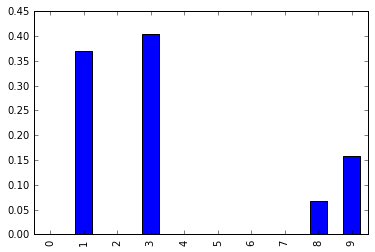

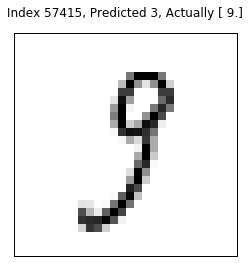

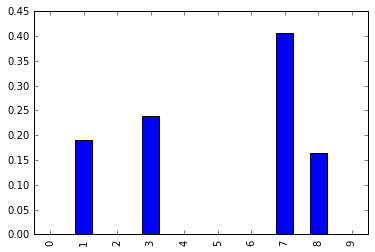

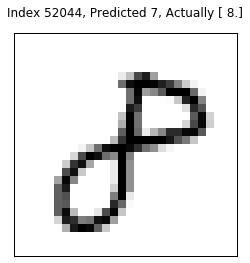

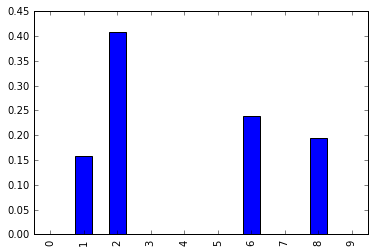

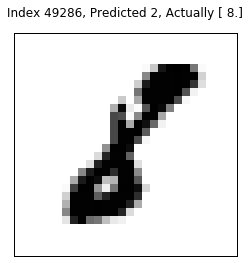

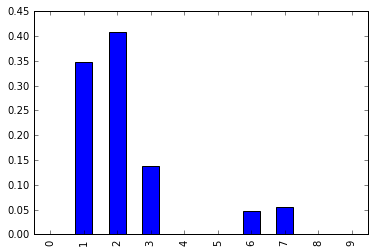

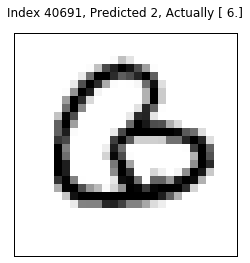

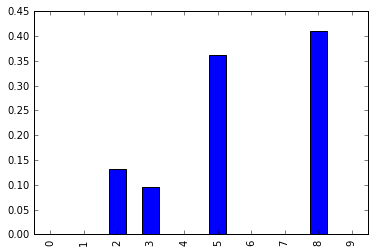

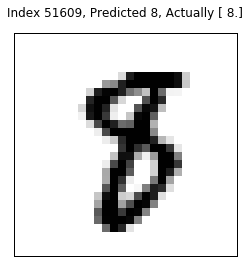

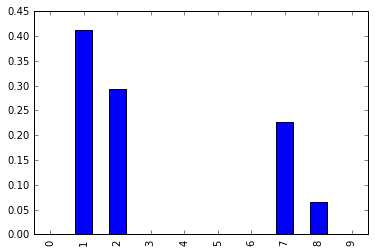

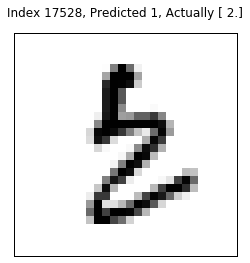

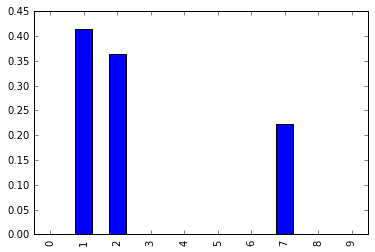

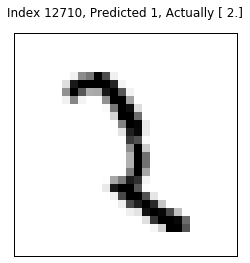

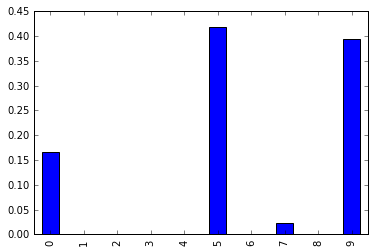

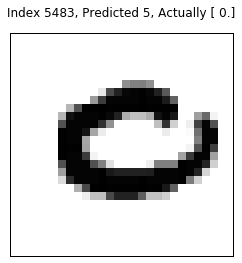

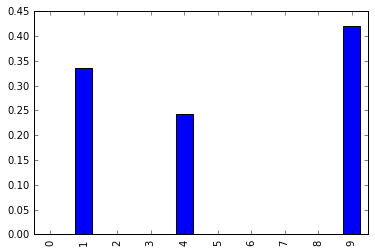

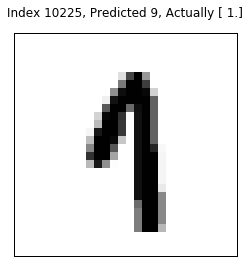

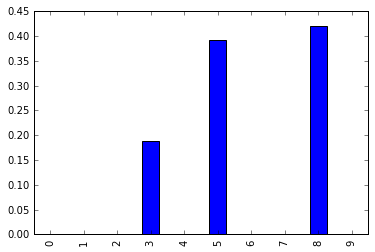

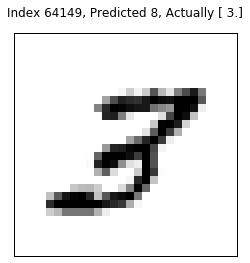

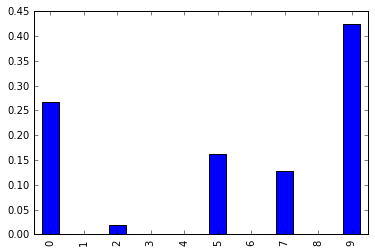

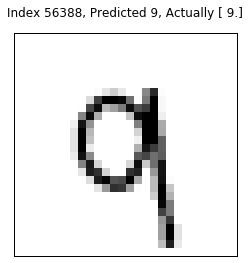

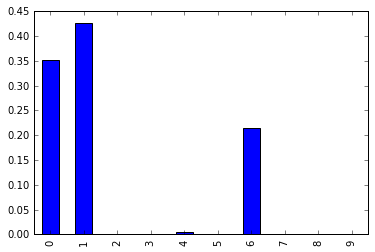

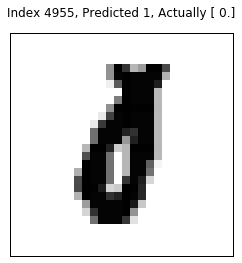

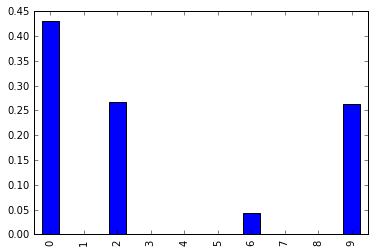

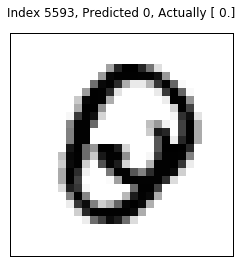

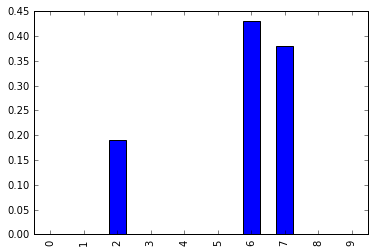

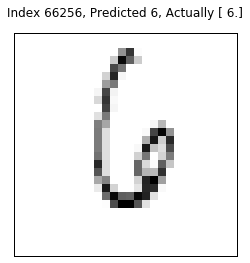

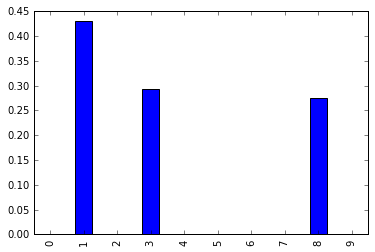

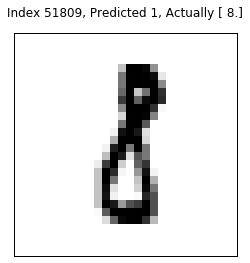

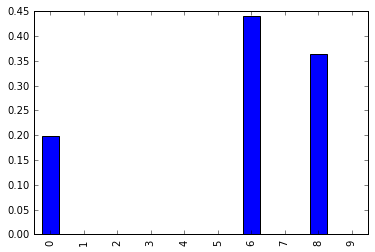

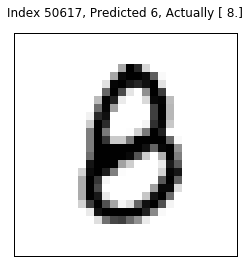

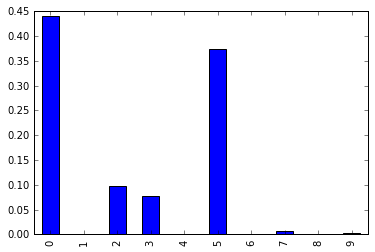

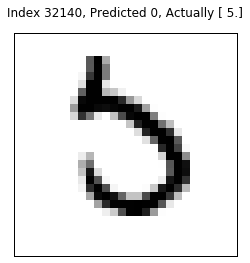

In [93]:
yhat = nn.predict(mnist.data).max(axis=1)
worst = yhat.argsort()[:30]

print(nn.predict(mnist.data[worst]).max(axis=1))

for i in range(len(worst)):
    predict_and_plot_image_index(worst[i])

In [94]:
# find accuracy on test set
nn.evaluate(test_x, test_y)

0.97685714285714287

In [97]:
# try throwing out every other of pixels
even_x = train_x.T[::2].T
less_pixels = f.FeedForwardNet(layers=[even_x.shape[1],256,10], transforms=[nl.Sigmoid, nl.Softmax])
less_pixels.fit(even_x, train_y, lr=0.1, max_iter=25, mini_batch_size=10,\
      save_accuracy=True, save_costs=True, report_every=1)

# test on dataset
less_pixels.evaluate(test_x.T[::2].T, test_y)

Epoch 1: 0.9540168067226891% accuracy
Epoch 2: 0.9704705882352941% accuracy
Epoch 3: 0.9788235294117648% accuracy
Epoch 4: 0.9805882352941176% accuracy
Epoch 5: 0.9849915966386554% accuracy
Epoch 6: 0.9874789915966387% accuracy
Epoch 7: 0.988% accuracy
Epoch 8: 0.9898487394957983% accuracy
Epoch 9: 0.9929915966386554% accuracy
Epoch 10: 0.9947058823529412% accuracy
Epoch 11: 0.9923193277310924% accuracy
Epoch 12: 0.9960168067226891% accuracy
Epoch 13: 0.9970420168067227% accuracy
Epoch 14: 0.9967731092436974% accuracy
Epoch 15: 0.996890756302521% accuracy
Epoch 16: 0.9977983193277311% accuracy
Epoch 17: 0.999327731092437% accuracy
Epoch 18: 0.9991596638655462% accuracy
Epoch 19: 0.9996974789915967% accuracy
Epoch 20: 0.9998823529411764% accuracy
Epoch 21: 0.9998991596638656% accuracy
Epoch 22: 1.0% accuracy
Epoch 23: 0.9999831932773109% accuracy
Epoch 24: 0.9999831932773109% accuracy
Epoch 25: 1.0% accuracy
Training completed


ValueError: shapes (5250,784) and (392,256) not aligned: 784 (dim 1) != 392 (dim 0)

[8880.0616480540575, 5479.1108044791818, 3949.0351080205191, 3721.5622546458549, 2827.1734150199281, 2276.1519242457102, 2188.2345581380359, 1783.2219513984176, 1330.534451158823, 1055.7903776739254, 1352.6228343512701, 823.35722889878298, 624.43380964130802, 616.11207020677568, 593.19106701529915, 492.02544631198271, 224.64268062098731, 237.63541494851017, 148.29403508394697, 110.92543432789829, 86.538946086739514, 69.367863147892081, 63.507371796789172, 57.479246983525407, 53.669431277728016]


0.97771428571428576

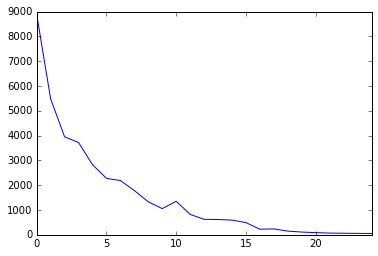

In [99]:
print(less_pixels.costs)
pd.Series(less_pixels.costs).plot()
less_pixels.evaluate(test_x.T[::2].T, test_y)

Epoch 1: 0.9026554621848739% accuracy
Epoch 2: 0.9230756302521008% accuracy
Epoch 3: 0.9292605042016807% accuracy
Epoch 4: 0.9343361344537815% accuracy
Epoch 5: 0.9374621848739496% accuracy
Epoch 6: 0.9390084033613445% accuracy
Epoch 7: 0.9455126050420168% accuracy
Epoch 8: 0.9469243697478992% accuracy
Epoch 9: 0.9445378151260504% accuracy
Epoch 10: 0.9507058823529412% accuracy
Epoch 11: 0.9513781512605042% accuracy
Epoch 12: 0.9509243697478992% accuracy
Epoch 13: 0.9580672268907563% accuracy
Epoch 14: 0.9561680672268907% accuracy
Epoch 15: 0.9610084033613445% accuracy
Epoch 16: 0.963546218487395% accuracy
Epoch 17: 0.9601512605042016% accuracy
Epoch 18: 0.9648571428571429% accuracy
Epoch 19: 0.965983193277311% accuracy
Epoch 20: 0.9663529411764706% accuracy
Epoch 21: 0.9683865546218487% accuracy
Epoch 22: 0.9702016806722689% accuracy
Epoch 23: 0.9663193277310924% accuracy
Epoch 24: 0.9681680672268907% accuracy
Epoch 25: 0.9692436974789916% accuracy
Training completed
[18129.0489828314

0.92676190476190479

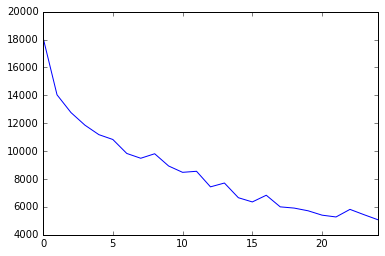

In [102]:
# try throwing out top half of pixels
half_x = train_x.T[:len(train_x[0])//2].T
less_pixels = f.FeedForwardNet(layers=[half_x.shape[1],256,10], transforms=[nl.Sigmoid, nl.Softmax])
less_pixels.fit(half_x, train_y, lr=0.1, max_iter=25, mini_batch_size=10,\
      save_accuracy=True, save_costs=True, report_every=1)

print(less_pixels.costs)
pd.Series(less_pixels.costs).plot()
less_pixels.evaluate(test_x.T[:len(test_x[0])//2].T, test_y)

In [104]:
prev_costs = less_pixels.costs

Epoch 1: 0.9695294117647059% accuracy
Epoch 2: 0.9728571428571429% accuracy
Epoch 3: 0.9750924369747899% accuracy
Epoch 4: 0.9747899159663865% accuracy
Epoch 5: 0.9774789915966386% accuracy
Epoch 6: 0.9784873949579832% accuracy
Epoch 7: 0.9815798319327731% accuracy
Epoch 8: 0.9775966386554622% accuracy
Epoch 9: 0.9774285714285714% accuracy
Epoch 10: 0.9779663865546219% accuracy
Training completed
[5132.4450452421097, 4552.8836751164799, 4210.3550125395204, 4172.9314395728852, 3856.385487238555, 3597.8622036096926, 3159.8735864379541, 3728.8623951654868, 3796.6204993432948, 3650.83913387752]


0.92628571428571427

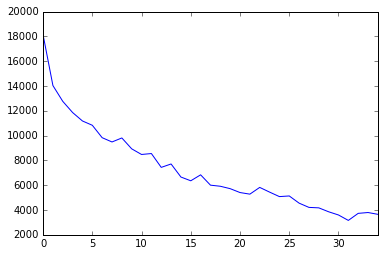

In [105]:
less_pixels.fit(half_x, train_y, lr=0.1, max_iter=10, mini_batch_size=10,\
      save_accuracy=True, save_costs=True, report_every=1)

print(less_pixels.costs)
pd.Series(np.concatenate((prev_costs, less_pixels.costs))).plot()
less_pixels.evaluate(test_x.T[:len(test_x[0])//2].T, test_y)

Epoch 1: 0.9620336134453782% accuracy
Epoch 2: 0.9729243697478992% accuracy
Epoch 3: 0.9832436974789917% accuracy
Epoch 4: 0.9844705882352941% accuracy
Epoch 5: 0.9876302521008403% accuracy
Epoch 6: 0.9896806722689075% accuracy
Epoch 7: 0.9908235294117647% accuracy
Epoch 8: 0.985764705882353% accuracy
Epoch 9: 0.9943865546218488% accuracy
Epoch 10: 0.9950924369747899% accuracy
Epoch 11: 0.9932268907563025% accuracy
Epoch 12: 0.996672268907563% accuracy
Epoch 13: 0.9942352941176471% accuracy
Epoch 14: 0.9948403361344538% accuracy
Epoch 15: 0.9955798319327731% accuracy
Epoch 16: 0.9972100840336134% accuracy
Epoch 17: 0.9983697478991597% accuracy
Epoch 18: 0.9959663865546219% accuracy
Epoch 19: 0.9957983193277311% accuracy
Epoch 20: 0.998436974789916% accuracy
Epoch 21: 0.9978823529411764% accuracy
Epoch 22: 0.997546218487395% accuracy
Epoch 23: 0.9995798319327731% accuracy
Epoch 24: 0.9967394957983193% accuracy
Epoch 25: 0.9990420168067227% accuracy
Training completed


0.98323809523809524

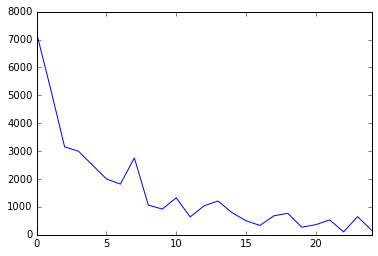

In [108]:
# try a semi-deep ReLu network
relu = f.FeedForwardNet(layers=[784, 256, 150, 75, 10], transforms=[nl.ReLu, nl.ReLu, nl.ReLu, nl.Softmax])
relu.fit(train_x, train_y, lr=0.01, max_iter=25, mini_batch_size=10,\
      save_accuracy=True, save_costs=True, report_every=1)

pd.Series(relu.costs).plot()
relu.evaluate(test_x, test_y)